TAHAP TAHAP CRISP DM

# Bussiness Understanding

Wendys adalah jaringan restoran dan waralaba makanan yang mengkhususkan dalam hamburger, di dalam tahapan ini kita mengukur jumlah kalori dan kadara lemak di setiap makanan yang ada di menu Wendys Jika kalori dan kadar lemak pada makanan terlalu tinggi akan berakibat fatal bagi kesehatan 

Data ini di dapat dari https://www.kaggle.com/datasets/mattop/wendys-menu-nutrition-data 

# Data Understanding

Pada sebuah tapahan data ini kita bisa melihat data ini terdapat:

0   Item            43 non-null     object

1   Category        43 non-null     object

2   Calories        43 non-null     int64

3   Fat             43 non-null     int64

4   SatFat          43 non-null     float64

5   TransFat        43 non-null     float64

6   Cholesterol     43 non-null     int64

7   Sodium          43 non-null     int64 

8   TotalCarb       43 non-null     int64  

9   DietaryFiber    43 non-null     int64 

10  Sugars          43 non-null     int64 

11  Protein         43 non-null     int64 
 
12  WeightWatchers  43 non-null     int64 

jadi jumlah type data float64(2), int64(9), dan object(2)

# Data Preparation

Pada kali ini kita menganalisis lebih lanjut kadar kalori dan lemak pada menu Wendy's yang sudah kita pilih kan x dan y nya 

Dimana :
x : Fat,SatFat,TransFat,Cholesterol,Sodium,TotalCarb,DietaryFiber,Sugars,Protein,WeightWatchers
Y : Calories

#  Modeling

Modeling pada tahapan ini untuk membuat model prediktif atau deskriptif. Pada tahapan kali ini saya Memakai model algoritma regresi linear

# Evaluation

Pada tahapan evaluasi ini kita bertujuan kuntuk mengetahui kadar kalori dan lemak. dalam tahapan ini saya menggunakan contoh protein 62, SatFat = 24.0, TransFat = 3.0, Cholesterol = 205 , Sodium = 1630, TotalCarb = 40,DietaryFiber = 2, Sugars = 8,Protein = 59,WeightWatchers = 923. maka estimasi jumlah kalori pada Menu Wendys yaitun :[950.05381942]

# Deployetmen

Ketika semua tehapan sudah di uji dan di pastikan sesuai model, maka kana ditampilkan di streamlit

# deskripsi library yang digunakan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [15]:
df = pd.read_csv('wendys.csv')

# Deskripsi Dataset

In [14]:
df.head()

,Item,Category,Calories,Fat,SatFat,TransFat,Cholesterol,Sodium,TotalCarb,DietaryFiber,Sugars,Protein,WeightWatchers
0,Baconator,Burgers,950,62,24.0,3.0,205,1630,40,2,8,59,923
1,Dave’s Double,Burgers,810,51,20.0,3.0,175,1280,41,3,8,49,789
2,Dave’s Single,Burgers,570,34,13.0,1.5,100,1110,40,3,9,30,562
3,Dave’s Triple,Burgers,1090,72,30.0,4.0,260,1650,43,3,9,71,1058
4,Double Stack,Burgers,390,21,9.0,1.5,90,740,26,1,6,25,380


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            43 non-null     object 
 1   Category        43 non-null     object 
 2   Calories        43 non-null     int64  
 3   Fat             43 non-null     int64  
 4   SatFat          43 non-null     float64
 5   TransFat        43 non-null     float64
 6   Cholesterol     43 non-null     int64  
 7   Sodium          43 non-null     int64  
 8   TotalCarb       43 non-null     int64  
 9   DietaryFiber    43 non-null     int64  
 10  Sugars          43 non-null     int64  
 11  Protein         43 non-null     int64  
 12  WeightWatchers  43 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 4.5+ KB


<Axes: >

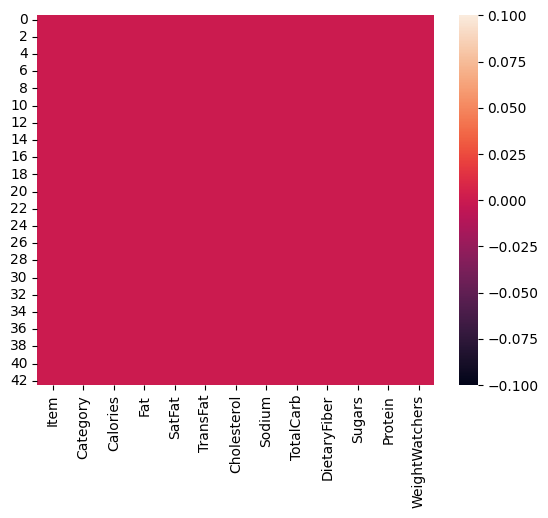

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,Calories,Fat,SatFat,TransFat,Cholesterol,Sodium,TotalCarb,DietaryFiber,Sugars,Protein,WeightWatchers
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,483.953488,27.186047,9.441860,0.406977,121.860465,1087.441860,36.720930,2.116279,4.534884,23.906977,474.116279
std,208.876126,14.978168,7.300692,0.933859,99.773692,425.916899,13.393896,1.383737,2.906060,14.667447,205.564057
min,120.000000,8.000000,1.500000,0.000000,0.000000,170.000000,4.000000,0.000000,0.000000,1.000000,124.000000
25%,350.000000,16.500000,3.500000,0.000000,50.000000,750.000000,27.000000,1.000000,2.000000,15.500000,342.000000
50%,450.000000,23.000000,8.000000,0.000000,90.000000,1030.000000,36.000000,2.000000,5.000000,20.000000,446.000000
75%,600.000000,33.500000,13.500000,0.000000,207.500000,1370.000000,45.000000,3.000000,6.500000,31.000000,600.000000
max,1090.000000,72.000000,31.000000,4.000000,420.000000,2020.000000,70.000000,6.000000,10.000000,71.000000,1058.000000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_7540\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

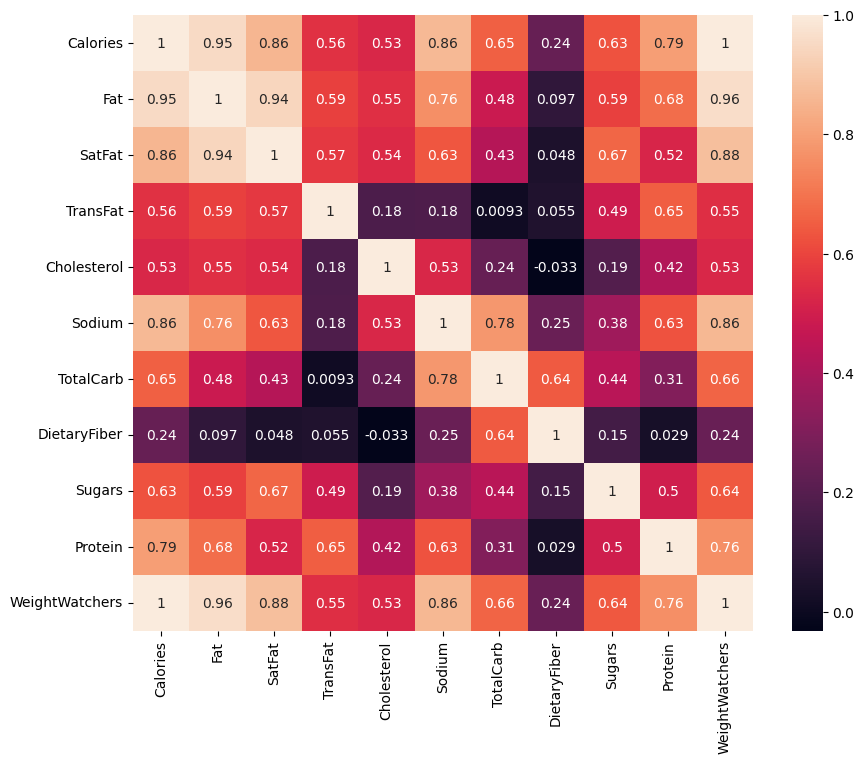

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Total Karbohidrah berdasarkan Category

In [16]:
category = df.groupby('Category').count()[['TotalCarb']].sort_values(by='TotalCarb',ascending=True).reset_index()
category = category.rename(columns={'TotalCarb':'CategoryCarb'})

(array([0, 1, 2]),
 [Text(0, 0, 'Burgers'), Text(1, 0, 'Breakfast'), Text(2, 0, 'Chicken')])

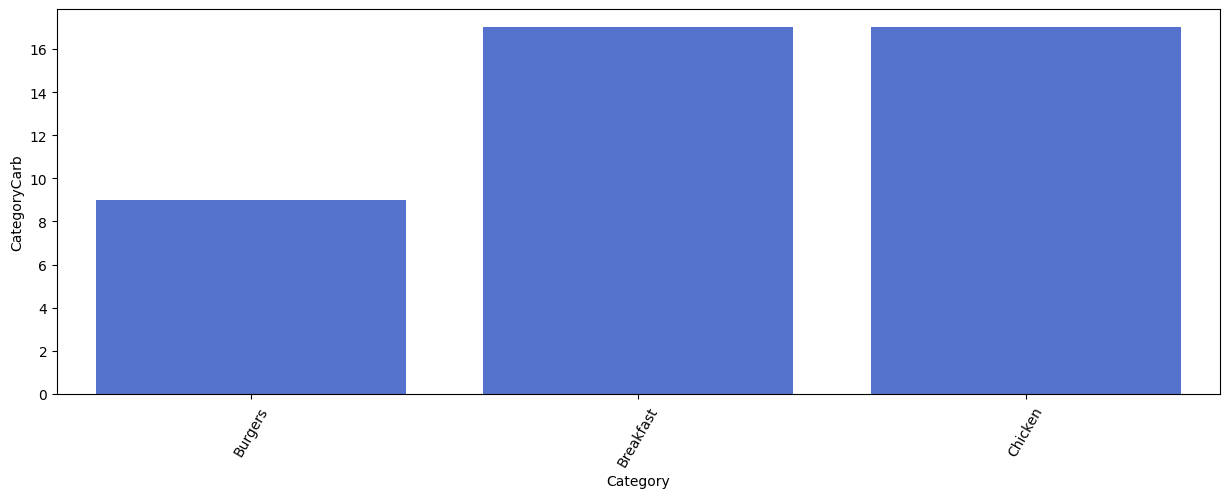

In [17]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=category['Category'], y=category['CategoryCarb'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Lemak

C:\Users\user\AppData\Local\Temp\ipykernel_8004\1407797106.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fat'])


<Axes: xlabel='Fat', ylabel='Density'>

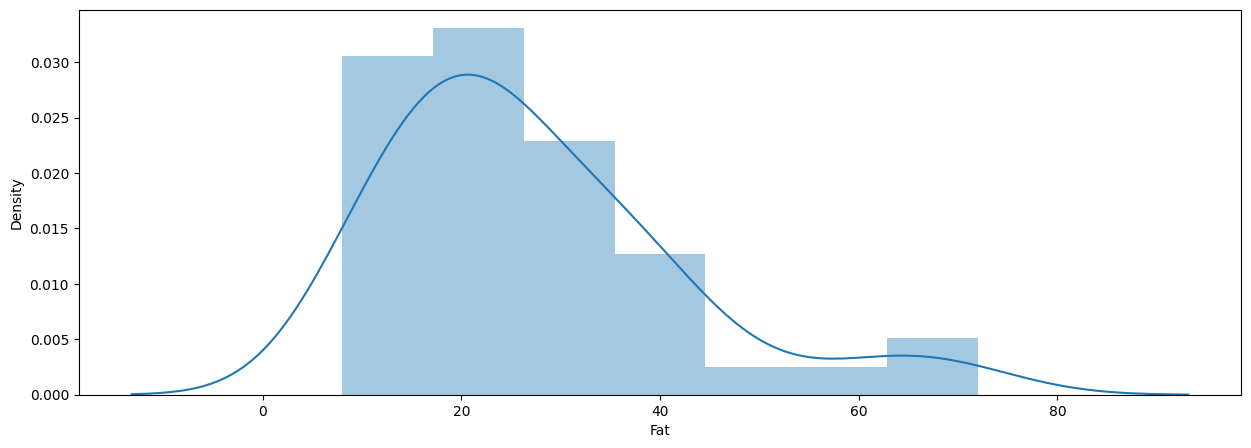

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df['Fat'])

# distribusi Jumlah Kalori

C:\Users\user\AppData\Local\Temp\ipykernel_8004\2070197214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

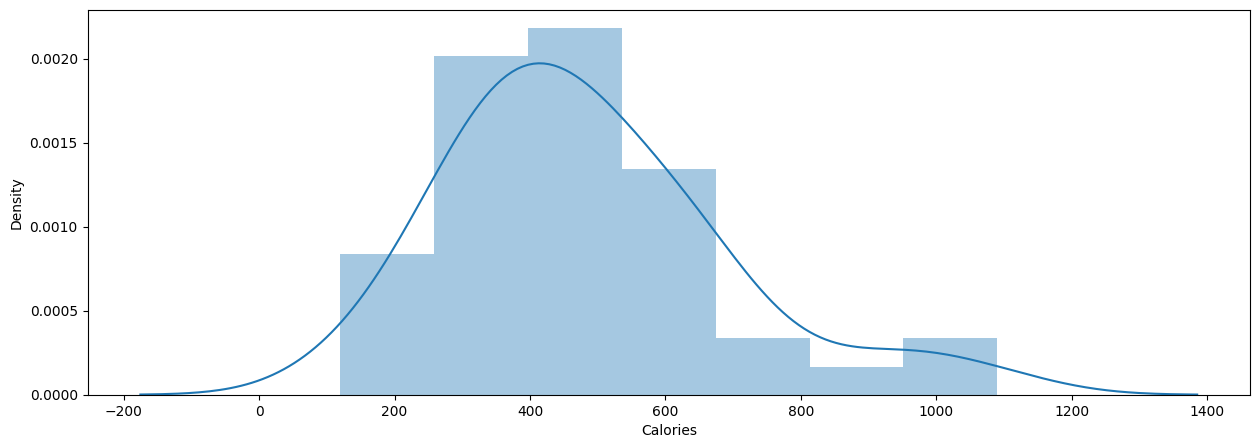

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df['Calories'])

# seleksi fitur

In [20]:
features = ['Fat','SatFat','TransFat','Cholesterol','Sodium','TotalCarb','DietaryFiber','Sugars','Protein','WeightWatchers']
x = df[features]
y = df['Calories']
x.shape, y.shape

((43, 10), (43,))

# split data training dan data testing

In [26]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(11,)

# membuat model regresi linier

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [28]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9999972371179867


# membuat inputan model regresi linier

In [29]:
#Fat = 62, SatFat = 24.0, TransFat = 3.0, Cholesterol = 205 , Sodium = 1630, TotalCarb = 40,DietaryFiber = 2, Sugars = 8,Protein = 59,WeightWatchers = 923
input_data = np.array([[62,24.0,3.0,205,1630,40,2,8,59,923]])

prediction = lr.predict(input_data) 
print('Estimasi Kalori Pada Menu Wendys:', prediction)
#calories = 950

Estimasi Kalori Pada Menu Wendys: [950.05381942]


c:\Users\user\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [18]:
import pickle

filename = 'estimasi_Wendys.sav'
pickle.dump(lr,open(filename,'wb'))